# <font color='black'>Data Pre-Processing</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas.plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.pyplot import hist

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv(r"/kaggle/input/kok-116/FootballTransfersSummer22.csv")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <font color='black'>Loading Our Data Set</font>

In [2]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,â‚¬42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD AlmerÃ­a,LaLiga,Spain,Real Sociedad,LaLiga,Spain,â‚¬18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,â‚¬50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,â‚¬30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,â‚¬10.00m,9/1/2022


# <font color='black'>Changing The DataTypes Of Columns</font>

In [3]:
import unicodedata
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
        if x[0] == '€':
            x = x[1:]
        return x.replace('.', '').replace('m', '0000').replace('Th','0').replace('a','')
    return x


In [4]:
df['cost'] = df['cost'].apply(clean_currency).astype('float')

In [5]:
df['cost']=df['cost'].astype('long')

In [6]:
df = df.sort_values(by:=['cost'], inplace=False, ascending=False)

In [7]:
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'])

In [8]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


# <font color='black'>Changing The Players Status to Free Agent</font>

In [9]:
df['origin_club'].loc[df['origin_club']=='Without Club'].replace('Without Club', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Disqualification'].replace('Disqualification', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Career Break'].replace('Career Break', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Unknown'].replace('Unknown', 'Free Agent', inplace= True)

In [10]:
df.columns

Index(['name', 'position', 'age', 'origin_club', 'league_origin_club',
       'country_origin_club', 'new_club', 'league_new_club',
       'country_new_club', 'cost', 'date_of_transfer'],
      dtype='object')

In [11]:
df

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
...,...,...,...,...,...,...,...,...,...,...,...
23772,Vulnet Islami,Goalkeeper,26.0,Renova Dzepciste,North Macedonia,North Macedonia,Arsimi,North Macedonia,North Macedonia,100,2022-07-01
230,Adel Jrad,Left-Back,20.0,JÃ¤rvenpÃ¤Ã¤n Palloseura,YkkÃ¶nen,Finland,Tikkurilan Palloseura,Kolmonen EtelÃ¤ C,Finland,100,2022-09-01
587,Alexandre Dujardin,Centre-Back,23.0,Without Club,NaN,NaN,Hong Kong Football Club,Hong Kong Premier League,Hongkong,100,2022-09-01
20164,Giovanni Scampini,Defensive Midfield,30.0,Vergiatese,Italy,Italy,FBC Saronno 1910,Italy,Italy,100,2022-07-01


In [12]:
df.isnull().sum()

name                      0
position                  0
age                     143
origin_club               0
league_origin_club      929
country_origin_club     929
new_club                  0
league_new_club        5570
country_new_club       5570
cost                      0
date_of_transfer          0
dtype: int64

# <font color='black'>Filling The Nulls</font>

In [13]:
df['league_origin_club']= df['league_origin_club'].fillna(method ='pad', axis=0)
df['country_origin_club']= df['country_origin_club'].fillna(method ='pad', axis=0)
df['league_new_club']= df['league_new_club'].fillna(method ='pad', axis=0)
df['country_new_club']= df['country_new_club'].fillna(method ='pad', axis=0)
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


In [14]:
df.isnull().sum()

name                     0
position                 0
age                    143
origin_club              0
league_origin_club       0
country_origin_club      0
new_club                 0
league_new_club          0
country_new_club         0
cost                     0
date_of_transfer         0
dtype: int64

In [15]:
df.dtypes

name                           object
position                       object
age                           float64
origin_club                    object
league_origin_club             object
country_origin_club            object
new_club                       object
league_new_club                object
country_new_club               object
cost                            int64
date_of_transfer       datetime64[ns]
dtype: object

# <font color='black'>Getting Rid of the Nulls</font>

In [16]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


In [17]:
df['age'].unique()

array([21., 22., 30., 29., 27., 24., 23., 26., 25., 33., 20., 28., 31.,
       19., 18., 32., 34., 35., 17., 37., 36., 39., 16., 38., 40., nan,
       43., 42., 41., 45., 15., 44., 46.])

In [18]:
import pandas as pd



# Calculate the mean of the 'age' column
age_mean = df['age'].mean()

# Fill null values in 'age' column with the mean
df['age'].fillna(age_mean, inplace=True)
df['age'] = df['age'].astype('int64') 
# Print the updated DataFrame
print(df)


                     name            position  age               origin_club  \
19252      Erling Haaland      Centre-Forward   21         Borussia Dortmund   
12700    Matthijs de Ligt         Centre-Back   22               Juventus FC   
19261         Sadio ManÃ©         Left Winger   30              Liverpool FC   
19303       Romelu Lukaku      Centre-Forward   29                Chelsea FC   
15126     Raheem Sterling         Left Winger   27           Manchester City   
...                   ...                 ...  ...                       ...   
23772       Vulnet Islami          Goalkeeper   26          Renova Dzepciste   
230             Adel Jrad           Left-Back   20  JÃ¤rvenpÃ¤Ã¤n Palloseura   
587    Alexandre Dujardin         Centre-Back   23              Without Club   
20164   Giovanni Scampini  Defensive Midfield   30                Vergiatese   
31616         JesÃºs West          Right-Back   23           CD Ãrabe Unido   

            league_origin_club country_

In [19]:
df.isnull().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
cost                   0
date_of_transfer       0
dtype: int64

In [20]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


In [22]:
df['name'] = df['name'].astype(str)
df['name'] = df['name'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))
#,, new_club, league_new_club, country_new_club

In [23]:
df['origin_club'] = df['origin_club'].astype(str)
df['origin_club'] = df['origin_club'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))

In [24]:
df['league_origin_club'] = df['league_origin_club'].astype(str)
df['league_origin_club'] = df['league_origin_club'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))

In [25]:
df['new_club'] = df['new_club'].astype(str)
df['new_club'] = df['new_club'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))

In [26]:
df['league_new_club'] = df['league_new_club'].astype(str)
df['league_new_club'] = df['league_new_club'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))

In [27]:
df['country_new_club'] = df['country_new_club'].astype(str)
df['country_new_club'] = df['country_new_club'].apply(lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore'))

In [28]:
print(df)

                     name            position  age            origin_club  \
19252      Erling Haaland      Centre-Forward   21      Borussia Dortmund   
12700    Matthijs de Ligt         Centre-Back   22            Juventus FC   
19261           Sadio Man         Left Winger   30           Liverpool FC   
19303       Romelu Lukaku      Centre-Forward   29             Chelsea FC   
15126     Raheem Sterling         Left Winger   27        Manchester City   
...                   ...                 ...  ...                    ...   
23772       Vulnet Islami          Goalkeeper   26       Renova Dzepciste   
230             Adel Jrad           Left-Back   20  Järvenpään Palloseura   
587    Alexandre Dujardin         Centre-Back   23           Without Club   
20164   Giovanni Scampini  Defensive Midfield   30             Vergiatese   
31616           Jess West          Right-Back   23         CD Árabe Unido   

           league_origin_club country_origin_club                 new_club 

22


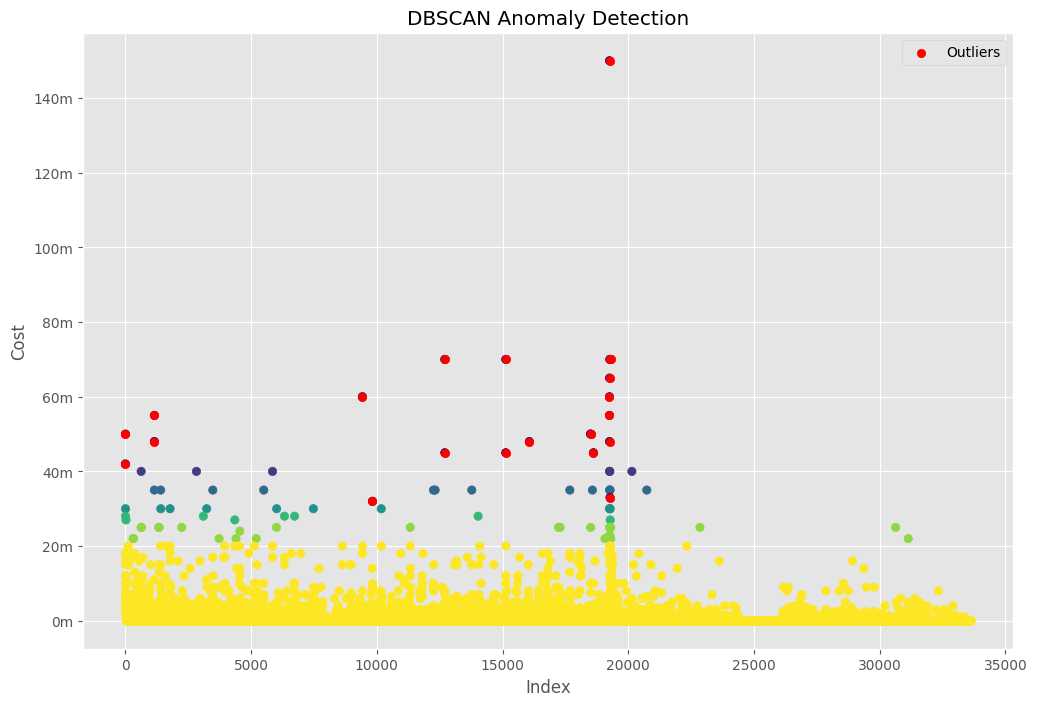

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the feature for anomaly detection
feature = 'cost'

# Prepare the data for anomaly detection
X = df[[feature]].values
X = StandardScaler().fit_transform(X)

# Perform anomaly detection using DBSCAN
eps = 0.5  # Epsilon: maximum distance between samples to be considered neighbors
min_samples = 5  # Minimum number of samples required to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Identify the outliers (anomalies) as points with label -1
outliers = X[labels == -1]
print(len(outliers))

# Convert the y-axis tick labels to represent values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}m')

# Visualize the data and outliers
plt.scatter(df.index, df[feature], c=labels, cmap='viridis')
plt.scatter(df.index[labels == -1], df[feature][labels == -1], color='red', label='Outliers')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('DBSCAN Anomaly Detection')
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the custom formatter to y-axis tick labels
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest


# Extract the "costs of players" column
costs = df['cost'].values.reshape(-1, 1)

# Train the isolation forest model
model = IsolationForest(n_estimators=100, contamination=0.01)
model.fit(costs)

# Predict the anomalies
anomalies = model.predict(costs)

# Create a dataframe with the anomalies
anomalies_d = df[anomalies == -1]
#anomalies_df = data.loc[anomalies == -1, ['name', 'cost', 'position', 'age','new_club','origin_club','league_origin_club','league_new_club','country_origin_club', 'country_new_club','date_of_transfer']]


# Print the anomalies dataframe
# Set the "name" 
print('Total outliers:', len(anomalies_d))
print(anomalies_d)


Total outliers: 308

                    name          position  age        origin_club  \

19252     Erling Haaland    Centre-Forward   21  Borussia Dortmund   

12700   Matthijs de Ligt       Centre-Back   22        Juventus FC   

19261         Sadio Mané       Left Winger   30       Liverpool FC   

19303      Romelu Lukaku    Centre-Forward   29         Chelsea FC   

15126    Raheem Sterling       Left Winger   27    Manchester City   

...                  ...               ...  ...                ...   

628    Andreas Cornelius    Centre-Forward   29        Trabzonspor   

17227    Cucho Hernández    Centre-Forward   23         Watford FC   

12598         Unai Núñez       Centre-Back   25    Athletic Bilbao   

3477         Jhon Lucumí       Centre-Back   24           KRC Genk   

3953     Giulio Maggiore  Central Midfield   24      Spezia Calcio   



       league_origin_club country_origin_club             new_club  \

19252          Bundesliga             Germany      Man

# <font color='black'>Showing All the Transfers OUT And Into The Top 5 leagues</font>

In [31]:
PremierLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
    | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

Liga = df[(df['league_origin_club']=='La Liga') & (df['country_origin_club']== 'Spain')
    | (df['league_new_club']=='La Liga') & (df['country_new_club']== 'Spain')]

##EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
  ##  | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

Ligue1 = df[(df['league_origin_club']=='Ligue 1') & (df['country_origin_club']== 'France')
   | (df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


SerieA = df[(df['league_origin_club']=='Serie A') & (df['country_origin_club']== 'Italy')
    | (df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


BundesLiga = df[(df['league_origin_club']=='Bundesliga') & (df['country_origin_club']== 'Germany')
    | (df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]



In [32]:
TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
TransfersTop5.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio Man,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Nez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


## <font color='black'>Showing The Transfer Market For The Premier League Only</font>

In [33]:
df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
    | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')].head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio Man,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Nez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


### <font color='black'>Number of Players Transfered Under the Age Of 30</font>

In [34]:
AgePreferance = df[(df['age'] < 30)]
len(AgePreferance.index)

27168

### <font color='black'>Number of Players Transfered Above the Age Of 30</font>

In [35]:
Age_Preferance = df[(df['age'] >= 30)]
len(Age_Preferance.index)

6457

### <font color='black'>Number of Players Purchased According To Their Positions</font>

In [36]:
TransfersTop5['position'].value_counts().head(13)

Centre-Back           321
Centre-Forward        268
Central Midfield      237
Goalkeeper            175
Right-Back            142
Left-Back             139
Defensive Midfield    128
Left Winger           127
Attacking Midfield     96
Right Winger           91
Second Striker         22
Left Midfield          17
Right Midfield         16
Name: position, dtype: int64

In [37]:
AttackingPositions = df[
    (df['position'] == 'Centre-Forward')
    | (df['position'] =='Left Winger') 
    | (df['position'] =='Right Winger') 
    | (df['position'] =='attack') 
    | (df['position'] =='Second Striker')]
len(AttackingPositions.index)

10060

In [38]:
MidfieldPositions = df[
    (df['position'] == 'Central Midfield') 
 |  (df['position'] =='Defensive Midfield') 
 |  (df['position'] =='Left Midfield') 
 |  (df['position'] =='Right Midfield') 
 |  (df['position'] =='Attacking Midfield') 
 |  (df['position'] =='midfield')]
len(MidfieldPositions.index)

9829

In [39]:
DefendingPositions = df[
    (df['position'] == 'defence') 
    | (df['position'] =='Centre-Back') 
    | (df['position'] =='Left-Back') 
    | (df['position'] =='Right-Back') 
    | (df['position'] =='Goalkeeper')]
len(DefendingPositions.index)

13736

In [40]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio Man,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


### <font color='black'>Players That Were Only Purchased By The Top 5 leagues</font>

In [41]:
PremierLeague = df[(df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

Liga = df[(df['league_new_club']=='LaLiga') & (df['country_new_club']== 'Spain')]

#EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
 #   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

Ligue1 = df[(df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


SerieA = df[(df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


BundesLiga = df[(df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]


In [42]:
TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
TransfersTop5

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin Nez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01
18501,Kalvin Phillips,Defensive Midfield,26,Leeds United,Premier League,England,Manchester City,Premier League,England,50000000,2022-07-04
18500,Gabriel Jesus,Centre-Forward,25,Manchester City,Premier League,England,Arsenal FC,Premier League,England,50000000,2022-07-04
...,...,...,...,...,...,...,...,...,...,...,...
28373,Cristiano Figueiredo,Goalkeeper,31,FC Dinamo 1948,Liga 2,Romania,Without Club,Bundesliga,Germany,2000,2022-07-01
31380,Mehmet Ibrahimi,Left Winger,19,RasenBallsport Leipzig U19,U19-BL N/NE,Germany,RB Leipzig,Bundesliga,Germany,1500,2022-07-01
29415,Florian Dietz,Centre-Forward,23,1.FC Köln II,Regionalliga West,Germany,1. FC Köln,Bundesliga,Germany,1500,2022-07-01
31919,Thomas Kastanaras,Centre-Forward,19,VfB Stuttgart U19,U19-BL S/SW,Germany,VfB Stuttgart,Bundesliga,Germany,1250,2022-07-01


### <font color='black'>Using Graph Plot To Demonstrate The Time Of Purchases In The Transfer Window</font>

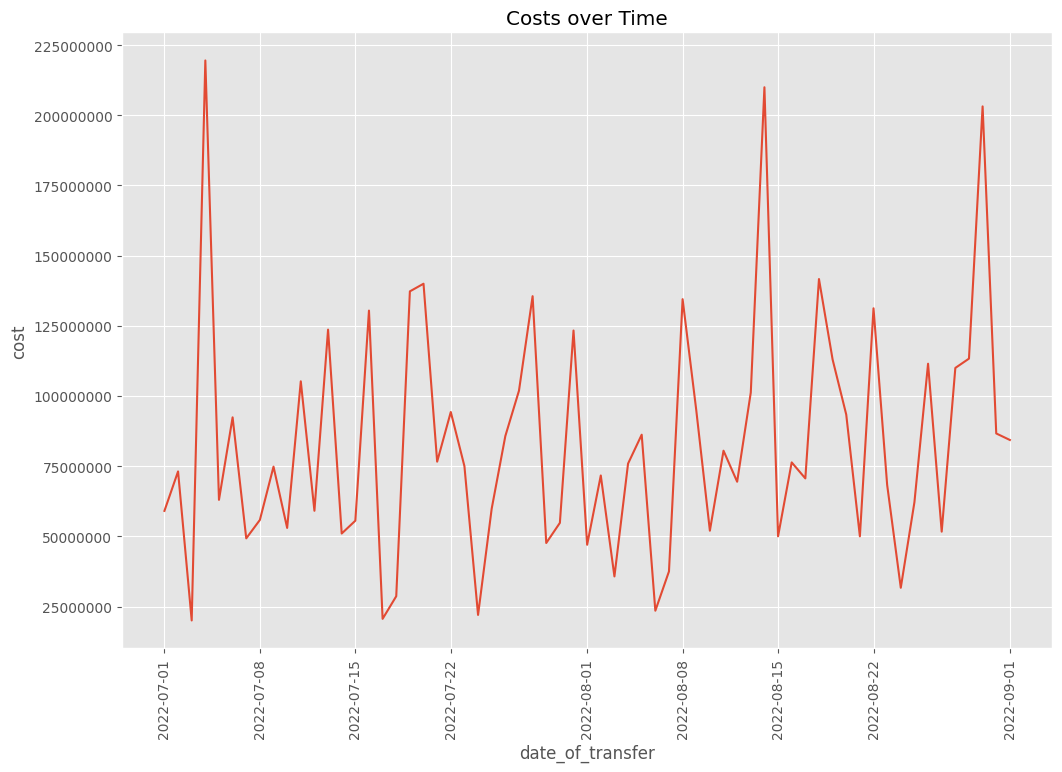

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data into a pandas dataframe

# Convert the 'Date' column to datetime format
TransfersTop5['date_of_transfer'] = pd.to_datetime(TransfersTop5['date_of_transfer'])

# Group the data by date and calculate the mean cost for each day
daily_costs = TransfersTop5.groupby('date_of_transfer')['cost'].mean()

# Filter out the days with no transfers
daily_costs = daily_costs[daily_costs > 0]

# Convert the y-axis tick labels to represent values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}0' if x >= 1 else f'{int(x*1000)}k')

# Plot the data
plt.plot(daily_costs.index, daily_costs.values)
plt.xlabel('date_of_transfer')
plt.ylabel('cost')
plt.xticks(rotation='vertical')
plt.title('Costs over Time')
plt.gca().yaxis.set_major_formatter(formatter)  # Apply the custom formatter to y-axis tick labels
plt.show()


##### <font color='black'>Using Histogram To Demonstrate How Likely To Be Purchased By The Top 5 Leagues If Your Age Is Between 20 And 30</font>

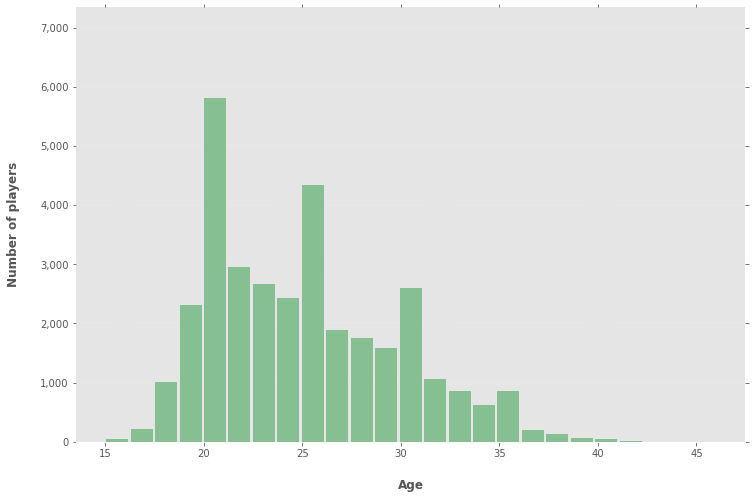

In [ ]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of players", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

### <font color='black'>Showing The Most Expensive Players According To Their Positions Using Bar Plot</font>

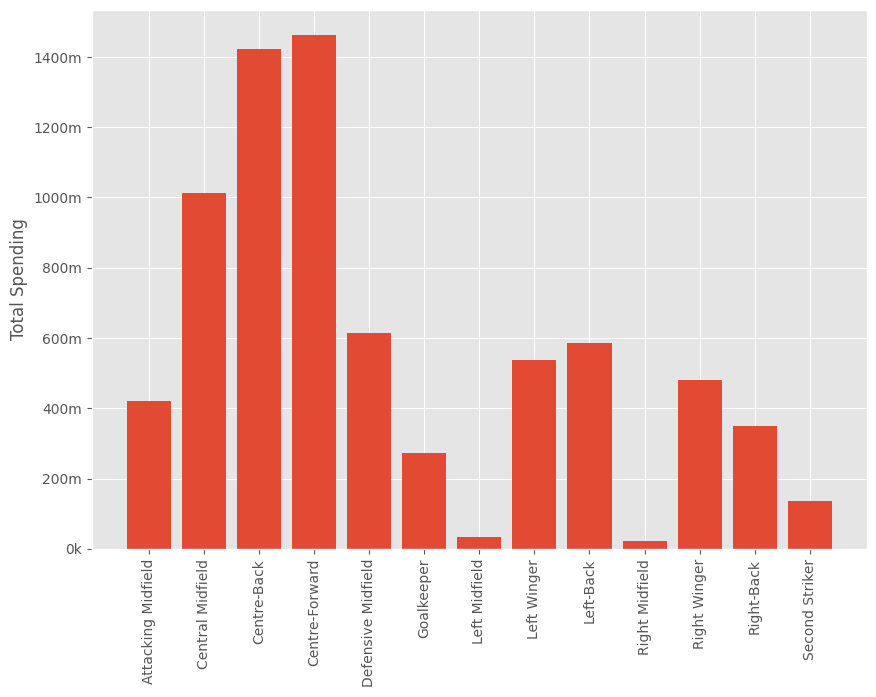

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data into a pandas dataframe

# Group the data by position and calculate the total spending
position_spending = TransfersTop5.groupby('position')['cost'].sum()

# Convert the y-axis tick labels to represent values in millions or thousands
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}m' if x >= 1e6 else f'{int(x/1e3)}k')

# Figure Size
fig = plt.figure(figsize=(10, 7))

# Horizontal Bar Plot
plt.bar(position_spending.index, position_spending)
plt.xticks(rotation=90)

# Apply the custom formatter to y-axis tick labels
plt.gca().yaxis.set_major_formatter(formatter)

# Set the y-axis label
plt.ylabel('Total Spending')

# Show Plot
plt.show()


### <font color='black'>Showing Which League Has Paid More During The Transfer Window</font>

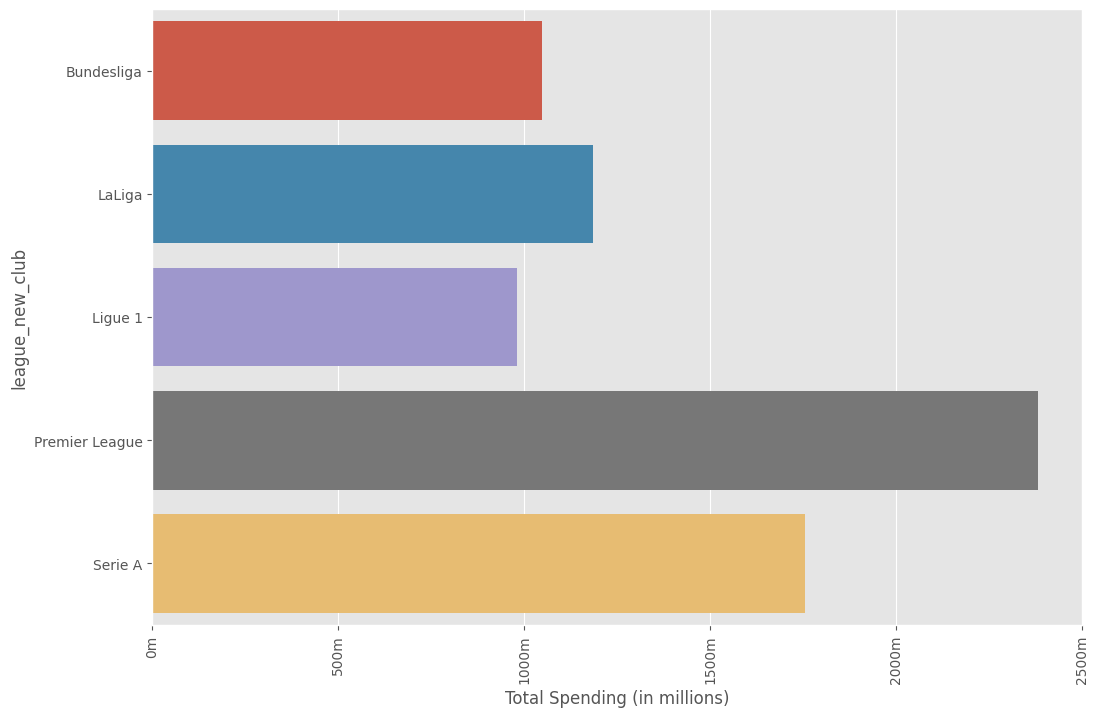

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the data into a pandas dataframe

# Group the data by league and calculate the total spending
league_spending = TransfersTop5.groupby('league_new_club')['cost'].sum() / 1e6  # Convert values to millions

# Create the bar plot
sns.barplot(x=league_spending, y=league_spending.index)

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Convert x-axis tick labels to represent values in millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x)}m')

# Apply the custom formatter to x-axis tick labels
plt.gca().xaxis.set_major_formatter(formatter)

# Set the x-axis label
plt.xlabel('Total Spending (in millions)')

# Show the plot
plt.show()


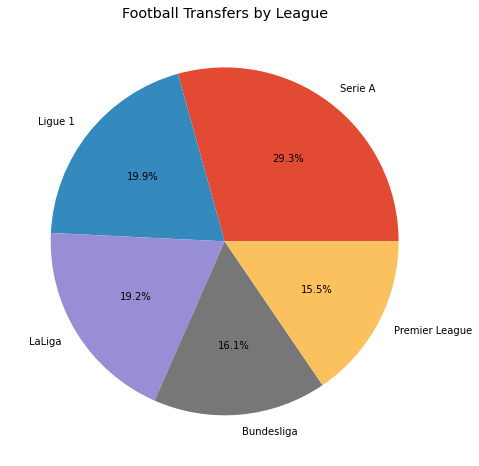

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# and the column with league names is named 'league_new_club'

# Count the occurrences of each league
league_counts = TransfersTop5['league_new_club'].value_counts()

# Create a pie chart
plt.pie(league_counts, labels=league_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Football Transfers by League')

# Display the chart
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Load the dataset and perform any necessary data preprocessing

# Select the columns of interest
selected_columns = ['cost', 'position','age', 'league_origin_club', 'league_new_club', 'country_origin_club', 'country_new_club','new_club','origin_club','date_of_transfer']
df = TransfersTop5[selected_columns]

# Create dummy variables for the player's position
position_dummies = pd.get_dummies(df['position'])
df = pd.concat([df, position_dummies], axis=1)

# Drop non-numeric columns and the target column
X = df.drop(['cost', 'position','league_origin_club', 'league_new_club', 'country_origin_club', 'country_new_club','new_club','origin_club','date_of_transfer'], axis=1)
y = df['cost'] > df['cost'].mean()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=72)

# Encode the string columns using pd.get_dummies()
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Perform feature selection using an SVM classifier
svm = SVC(kernel='linear', random_state=42)
selector = SelectFromModel(svm)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train an SVM classifier using the selected features
svm_selected = SVC(kernel='linear', random_state=42)
svm_selected.fit(X_train_selected, y_train)



y_pred_test = svm_selected.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy_percent = round(test_accuracy * 100)
print('accuracy-score:',test_accuracy_percent,'%')


accuracy-score: 82 %


In [ ]:
#### import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset and perform any necessary data preprocessing

# Select the columns of interest
selected_columns = ['cost', 'position', 'age', 'league_origin_club', 'league_new_club', 'country_origin_club',
                    'country_new_club', 'new_club', 'origin_club', 'date_of_transfer']
df = TransfersTop5[selected_columns]

# Create dummy variables for the player's position
position_dummies = pd.get_dummies(df['position'])
df = pd.concat([df, position_dummies], axis=1)

# Drop non-numeric columns and the target column
X = df.drop(['cost', 'position', 'league_origin_club', 'league_new_club', 'country_origin_club',
             'country_new_club', 'new_club', 'origin_club', 'date_of_transfer'], axis=1)
y = df['cost'] > df['cost'].mean()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=2000)

# Encode the string columns using pd.get_dummies()
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Perform univariate feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train a Naive Bayes classifier using the selected features
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_selected, y_train)

y_pred_test = naive_bayes.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy_percent = round(test_accuracy * 100)
print('accuracy-score:', test_accuracy_percent, '%')


accuracy-score: 78 %


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt



# Prepare the data
X = TransfersTop5[['age']]
y = TransfersTop5['cost']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)


RMSE: 11401439.814503666
